In [426]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [427]:

df = pd.read_excel("./Data/all_important_games.xlsx")
df.drop_duplicates(subset="game_id", keep="first", inplace=True)

df1 = pd.read_excel("./Data/all_important_tournament_games.xlsx")
df1.drop_duplicates(subset="game_id", keep="first", inplace=True)

df = df.append(df1, ignore_index=True)



df




/var/folders/qh/tm79qg_s6_n_ywvr9by4s4jh0000gn/T/ipykernel_12907/3529722694.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)


,G,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,opponent,Margin,game_id,Year
0,1,2015-11-13,7:00p,REG,H,AEC,0.93,W,78,65,NaN,1,0,W 1,Rupp Arena,Kentucky,Albany,13,Albany$Kentucky-2015-11-13,2016
1,1,2015-11-13,8:00p,REG,H,OVC,-6.04,W,80,41,NaN,1,0,W 1,Memorial Gymnasium,Vanderbilt,Austin Peay,39,Austin Peay$Vanderbilt-2015-11-13,2016
2,1,2015-11-13,8:00p,REG,A,MVC,17.39,L,63,88,NaN,0,1,L 1,Charles Koch Arena,Charleston Southern,Wichita St.,-25,Charleston Southern$Wichita State-2015-11-13,2016
3,1,2015-11-13,7:00p,REG,A,SEC,9.41,W,92,90,OT,1,0,W 1,Stegeman Coliseum,Chattanooga,Georgia,2,Chattanooga$Georgia-2015-11-13,2016
4,1,2015-11-13,5:00p,REG,N,Big 12,16.93,L,62,68,NaN,0,1,L 1,Sanford Pentagon,Colorado,Iowa St.,-6,Colorado$Iowa State-2015-11-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,37,2019-03-31,2:20p,NCAA,N,SEC,20.84,L,71,77,OT,30,7,L 1,Sprint Center,Kentucky,Auburn,-6,Auburn$Kentucky-2019-03-31,2019
9659,38,2019-03-31,5:05p,NCAA,N,Big Ten,24.93,L,67,68,NaN,32,6,L 1,Capital One Arena,Duke,Michigan St.,-1,Michigan State$Duke-2019-03-31,2019
9660,37,2019-04-06,6:09p,NCAA,N,SEC,20.84,W,63,62,NaN,34,3,W 5,U.S. Bank Stadium,Virginia,Auburn,1,Auburn$Virginia-2019-04-06,2019
9661,37,2019-04-06,8:49p,NCAA,N,Big Ten,24.93,W,61,51,NaN,31,6,W 5,U.S. Bank Stadium,Texas Tech,Michigan St.,10,Texas Tech$Michigan State-2019-04-06,2019


In [428]:
df.head()

,G,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,opponent,Margin,game_id,Year
0,1,2015-11-13,7:00p,REG,H,AEC,0.93,W,78,65,NaN,1,0,W 1,Rupp Arena,Kentucky,Albany,13,Albany$Kentucky-2015-11-13,2016
1,1,2015-11-13,8:00p,REG,H,OVC,-6.04,W,80,41,NaN,1,0,W 1,Memorial Gymnasium,Vanderbilt,Austin Peay,39,Austin Peay$Vanderbilt-2015-11-13,2016
2,1,2015-11-13,8:00p,REG,A,MVC,17.39,L,63,88,NaN,0,1,L 1,Charles Koch Arena,Charleston Southern,Wichita St.,-25,Charleston Southern$Wichita State-2015-11-13,2016
3,1,2015-11-13,7:00p,REG,A,SEC,9.41,W,92,90,OT,1,0,W 1,Stegeman Coliseum,Chattanooga,Georgia,2,Chattanooga$Georgia-2015-11-13,2016
4,1,2015-11-13,5:00p,REG,N,Big 12,16.93,L,62,68,NaN,0,1,L 1,Sanford Pentagon,Colorado,Iowa St.,-6,Colorado$Iowa State-2015-11-13,2016


In [429]:
team_stats = pd.read_excel("./Data/all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [430]:
merged = df.merge(team_stats, left_on=['team', 'Year'], right_on=['TEAM', 'Year'])

years = merged["Year"]

from sklearn.preprocessing import MinMaxScaler
num_cols = merged.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()

# normalize the numerical columns
merged[num_cols] = scaler.fit_transform(merged[num_cols])

merged["Year"] = years

merged


,G_x,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,0.000000,2015-11-13,7:00p,REG,H,AEC,0.508149,W,0.410714,0.418367,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
1,0.102564,2015-11-24,9:00p,REG,H,Patriot,0.366783,W,0.446429,0.387755,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
2,0.205128,2015-12-09,7:00p,REG,H,OVC,0.426479,W,0.500000,0.438776,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
3,0.307692,2016-01-02,7:00p,REG,H,SEC,0.635964,W,0.455357,0.377551,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
4,0.358974,2016-01-09,6:00p,REG,A,SEC,0.621864,W,0.401786,0.377551,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.717949,2023-02-25,5:00p,REG,H,MAC,0.638894,L,0.330357,0.561224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.274786,NaN,NaN
9659,0.692308,2023-03-02,7:00p,REG,A,MAAC,0.636513,L,0.375000,0.704082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255862,NaN,NaN
9660,0.820513,2023-03-11,7:30p,CTOURN,N,MAAC,0.636513,L,0.205357,0.530612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255862,NaN,NaN
9661,0.794872,2023-03-02,7:30p,CTOURN,N,OVC,0.359275,L,0.455357,0.683673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.376583,NaN,NaN


Training Set and Testing set will be filtered to correct features and values in later steps

In [431]:
training_set = merged
training_set

,G_x,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,0.000000,2015-11-13,7:00p,REG,H,AEC,0.508149,W,0.410714,0.418367,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
1,0.102564,2015-11-24,9:00p,REG,H,Patriot,0.366783,W,0.446429,0.387755,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
2,0.205128,2015-12-09,7:00p,REG,H,OVC,0.426479,W,0.500000,0.438776,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
3,0.307692,2016-01-02,7:00p,REG,H,SEC,0.635964,W,0.455357,0.377551,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
4,0.358974,2016-01-09,6:00p,REG,A,SEC,0.621864,W,0.401786,0.377551,...,0.582734,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.717949,2023-02-25,5:00p,REG,H,MAC,0.638894,L,0.330357,0.561224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.274786,NaN,NaN
9659,0.692308,2023-03-02,7:00p,REG,A,MAAC,0.636513,L,0.375000,0.704082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255862,NaN,NaN
9660,0.820513,2023-03-11,7:30p,CTOURN,N,MAAC,0.636513,L,0.205357,0.530612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255862,NaN,NaN
9661,0.794872,2023-03-02,7:30p,CTOURN,N,OVC,0.359275,L,0.455357,0.683673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.376583,NaN,NaN


In [432]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['opponent'])
training_set.head()

,G_x,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Winner
0,0.000000,2015-11-13,7:00p,REG,H,AEC,0.508149,W,0.410714,0.418367,...,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2,Kentucky
1,0.102564,2015-11-24,9:00p,REG,H,Patriot,0.366783,W,0.446429,0.387755,...,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2,Kentucky
2,0.205128,2015-12-09,7:00p,REG,H,OVC,0.426479,W,0.500000,0.438776,...,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2,Kentucky
3,0.307692,2016-01-02,7:00p,REG,H,SEC,0.635964,W,0.455357,0.377551,...,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2,Kentucky
4,0.358974,2016-01-09,6:00p,REG,A,SEC,0.621864,W,0.401786,0.377551,...,0.517711,0.610442,0.188596,0.57764,0.326923,0.341991,0.820652,R32,0.2,Kentucky


SELECT FEATURES FOR TRAINING SET HERE

In [433]:
training_set = training_set[['team', 'opponent', "Winner", "W/L", "SRS", 'Site',"BARTHAG" ,"2P_O", "3P_O" ,"TOR", "Year", "Type", "Date"]]
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA

print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)
save = training_set.copy()
save


7803


,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date
0,Kentucky,Albany,Kentucky,W,0.508149,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2015-11-13
1,Kentucky,Boston University,Kentucky,W,0.366783,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2015-11-24
2,Kentucky,Eastern Kentucky,Kentucky,W,0.426479,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2015-12-09
3,Kentucky,Mississippi,Kentucky,W,0.635964,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2016-01-02
4,Kentucky,Alabama,Kentucky,W,0.621864,A,0.976050,0.610442,0.577640,0.217742,2016,REG,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,Saint Peter's,Iona,Iona,L,0.403589,N,0.167546,0.445783,0.322981,0.790323,2019,CTOURN,2019-03-08
7799,VMI,Wofford,Wofford,L,0.746017,N,0.223254,0.397590,0.503106,0.241935,2019,CTOURN,2019-03-09
7800,New Orleans,Abilene Christian,Abilene Christian,L,0.456144,N,0.249525,0.381526,0.372671,0.669355,2019,CTOURN,2019-03-16
7801,Norfolk St.,North Carolina Central,North Carolina Central,L,0.279985,N,0.273897,0.337349,0.602484,0.548387,2019,CTOURN,2019-03-16


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [434]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["opponent"]=encoder.fit_transform(training_set["opponent"])
converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away


converted_season.head()

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date
0,135,6,Kentucky,W,0.508149,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-13
1,135,26,Kentucky,W,0.366783,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-24
2,135,77,Kentucky,W,0.426479,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-12-09
3,135,171,Kentucky,W,0.635964,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-02
4,135,3,Kentucky,W,0.621864,0,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-09


In [435]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date
0,135,6,135,W,0.508149,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-13
1,135,26,135,W,0.366783,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-24
2,135,77,135,W,0.426479,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-12-09
3,135,171,135,W,0.635964,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-02
4,135,3,135,W,0.621864,0,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-09


In [436]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date
0,135,6,135,0.508149,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-13
1,135,26,135,0.366783,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-24
2,135,77,135,0.426479,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-12-09
3,135,171,135,0.635964,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-02
4,135,3,135,0.621864,0,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-09


In [437]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date,team_game_win
0,135,6,135,0.508149,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-13,2.0
1,135,26,135,0.366783,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-11-24,2.0
2,135,77,135,0.426479,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2015-12-09,2.0
3,135,171,135,0.635964,1,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-02,2.0
4,135,3,135,0.621864,0,0.97605,0.610442,0.57764,0.217742,2016,REG,2016-01-09,2.0


CORRELATION MATRIX

Note: you may need to restart the kernel to use updated packages.


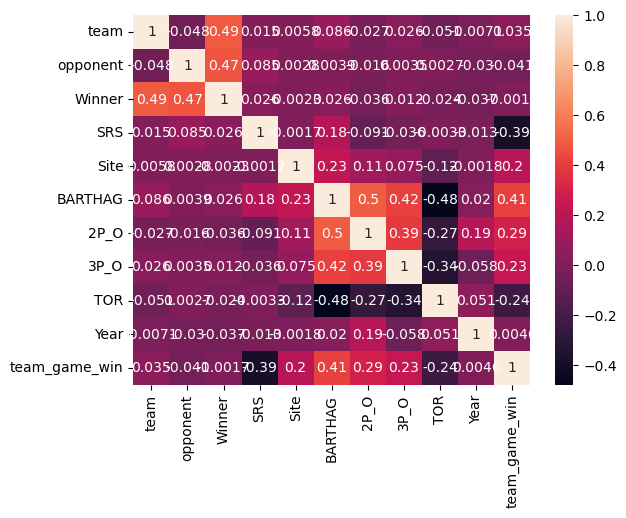

In [438]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

Extract any features that have high correlation. 

TRAINING DATA will be set to entire 2016-18 seasons and testing data will be set to 2019 NCAA tournament games

In [439]:

year_to_examine = 2018
restrict_to_first_round = True


training_set = converted_season.loc[converted_season["Year"] != year_to_examine] # training set 
testing_set = converted_season.loc[(converted_season["Year"] == year_to_examine) & (converted_season["Type"] == "NCAA")] # testing set


# This is to restrict testing to first round or not... dates listed before for years

### 2019
# 2019-03-21 | 2019-03-22

### 2018
# 2018-03-15 | 2018-03-16

### 2017
# 2017-03-16 | 2017-03-17

### 2016
# 2016-03-17 | 2016-03-18

dates = {"2019": ("2019-03-21", "2019-03-22"),
         "2018": ("2018-03-15", "2018-03-16"),
         "2017": ("2017-03-16", "2017-03-17"),
         "2016": ("2016-03-17", "2016-03-18")}


if (restrict_to_first_round == True):
    date_tuple = dates[str(year_to_examine)]
    print("Examining Year: ", year_to_examine)
    testing_set = testing_set.loc[(testing_set["Date"] == date_tuple[0]) | (testing_set["Date"] == date_tuple[1])]



print(len(testing_set))

testing_set.head()

Examining Year:  2018
32


,team,opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date,team_game_win
3895,132,61,132,0.790515,2,0.877611,0.630522,0.422360,0.298387,2018,NCAA,2018-03-16,2.0
3942,281,282,281,0.791064,2,0.852290,0.357430,0.273292,0.451613,2018,NCAA,2018-03-16,2.0
3976,71,125,71,0.504853,2,0.983963,0.734940,0.614907,0.322581,2018,NCAA,2018-03-15,2.0
4021,174,89,89,0.780077,2,0.860308,0.506024,0.726708,0.588710,2018,NCAA,2018-03-16,1.0
4038,341,158,158,0.568211,2,0.886790,0.646586,0.670807,0.241935,2018,NCAA,2018-03-16,1.0


In [440]:
training_set = training_set.drop(["Year", "Type", "Date"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year", "Type", "Date"], axis=1)

X_both = training_set.append(testing_set, ignore_index=True)
Y_both = X_both["team_game_win"]
X_both = X_both.drop(["team_game_win"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



5859
32


/var/folders/qh/tm79qg_s6_n_ywvr9by4s4jh0000gn/T/ipykernel_12907/34782439.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_both = training_set.append(testing_set, ignore_index=True)


array([[135.        ,   6.        , 135.        ,   0.50814869,
          1.        ,   0.9760498 ,   0.61044177,   0.57763975,
          0.21774194],
       [135.        ,  26.        , 135.        ,   0.36678264,
          1.        ,   0.9760498 ,   0.61044177,   0.57763975,
          0.21774194],
       [135.        ,  77.        , 135.        ,   0.42647867,
          1.        ,   0.9760498 ,   0.61044177,   0.57763975,
          0.21774194],
       [135.        , 171.        , 135.        ,   0.63596411,
          1.        ,   0.9760498 ,   0.61044177,   0.57763975,
          0.21774194],
       [135.        ,   3.        , 135.        ,   0.62186413,
          0.        ,   0.9760498 ,   0.61044177,   0.57763975,
          0.21774194]])

In [441]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Y_train

In [442]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [443]:
kernels = ["linear", "rbf", "poly"]
# CS = [0.1, 1, 10]
CS = [10]

In [444]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="linear")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    linear_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.8571428571428571  | Recall:  0.5  | Accuracy:  0.78125  | F1 Score:  0.631578947368421


In [445]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="rbf")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    rbf_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  1.0  | Recall:  0.75  | Accuracy:  0.90625  | F1 Score:  0.8571428571428571


In [446]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="poly")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.7  | Recall:  0.5833333333333334  | Accuracy:  0.75  | F1 Score:  0.6363636363636365


In [447]:
t = pd.DataFrame.from_dict({'pred': rbf_ypred, 'actual':Y_test.flatten()})


In [448]:
t

,pred,actual
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,2.0,2.0
6,2.0,1.0
7,2.0,2.0
8,2.0,2.0
9,2.0,2.0


In [449]:
save

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date
0,Kentucky,Albany,Kentucky,W,0.508149,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2015-11-13
1,Kentucky,Boston University,Kentucky,W,0.366783,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2015-11-24
2,Kentucky,Eastern Kentucky,Kentucky,W,0.426479,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2015-12-09
3,Kentucky,Mississippi,Kentucky,W,0.635964,H,0.976050,0.610442,0.577640,0.217742,2016,REG,2016-01-02
4,Kentucky,Alabama,Kentucky,W,0.621864,A,0.976050,0.610442,0.577640,0.217742,2016,REG,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,Saint Peter's,Iona,Iona,L,0.403589,N,0.167546,0.445783,0.322981,0.790323,2019,CTOURN,2019-03-08
7799,VMI,Wofford,Wofford,L,0.746017,N,0.223254,0.397590,0.503106,0.241935,2019,CTOURN,2019-03-09
7800,New Orleans,Abilene Christian,Abilene Christian,L,0.456144,N,0.249525,0.381526,0.372671,0.669355,2019,CTOURN,2019-03-16
7801,Norfolk St.,North Carolina Central,North Carolina Central,L,0.279985,N,0.273897,0.337349,0.602484,0.548387,2019,CTOURN,2019-03-16


In [450]:

check = save[(save['Year'] == year_to_examine) & (save['Type']=='NCAA')]

if (restrict_to_first_round == True):
    date_tuple = dates[str(year_to_examine)]
    check = check.loc[(check["Date"] == date_tuple[0]) | (check["Date"] == date_tuple[1])]

check

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date
3895,Kansas St.,Creighton,Kansas St.,W,0.790515,N,0.877611,0.630522,0.422360,0.298387,2018,NCAA,2018-03-16
3942,Syracuse,TCU,Syracuse,W,0.791064,N,0.852290,0.357430,0.273292,0.451613,2018,NCAA,2018-03-16
3976,Duke,Iona,Duke,W,0.504853,N,0.983963,0.734940,0.614907,0.322581,2018,NCAA,2018-03-15
4021,Missouri,Florida St.,Florida St.,L,0.780077,N,0.860308,0.506024,0.726708,0.588710,2018,NCAA,2018-03-16
4038,Wichita St.,Marshall,Marshall,L,0.568211,N,0.886790,0.646586,0.670807,0.241935,2018,NCAA,2018-03-16
4112,Xavier,Texas Southern,Xavier,W,0.353232,N,0.943765,0.730924,0.614907,0.298387,2018,NCAA,2018-03-16
4158,Arizona,Buffalo,Buffalo,L,0.637429,N,0.871703,0.763052,0.596273,0.322581,2018,NCAA,2018-03-15
4181,North Carolina,Lipscomb,North Carolina,W,0.452664,N,0.947035,0.534137,0.534161,0.258065,2018,NCAA,2018-03-16
4278,Texas A&M,Providence,Texas A&M,W,0.694745,N,0.883520,0.594378,0.347826,0.459677,2018,NCAA,2018-03-16
4294,Gonzaga,UNC Greensboro,Gonzaga,W,0.574254,N,0.941760,0.823293,0.590062,0.209677,2018,NCAA,2018-03-15


In [451]:
check['pred'] = t['pred'].tolist()
check['actual'] = t['actual'].tolist()
# if 2, team column won, 1 is team column loss

In [452]:

# We predict one team winning, but the other team actually won 
check[(check['actual'] != check['pred'])]

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,TOR,Year,Type,Date,pred,actual
4158,Arizona,Buffalo,Buffalo,L,0.637429,N,0.871703,0.763052,0.596273,0.322581,2018,NCAA,2018-03-15,2.0,1.0
4319,Virginia,UMBC,UMBC,L,0.454129,N,0.986073,0.497992,0.683230,0.040323,2018,NCAA,2018-03-16,2.0,1.0
4882,Davidson,Kentucky,Kentucky,L,0.806812,N,0.840262,0.755020,0.720497,0.080645,2018,NCAA,2018-03-15,2.0,1.0


ROC Curve, Confusion Matrix, and Learning Curve

svm with best accuracy is chosen as final model  

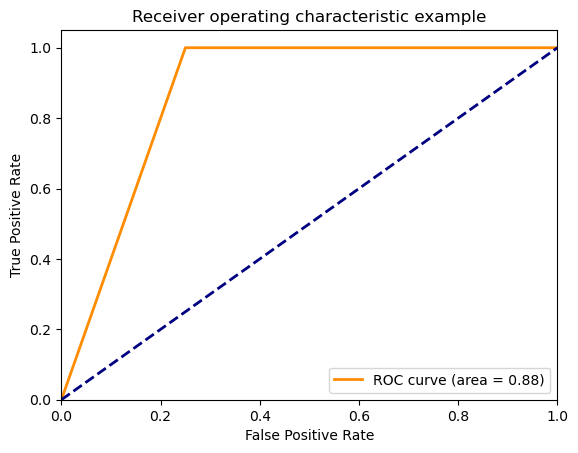

In [453]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test - 1, rbf_ypred - 1)

# Compute the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


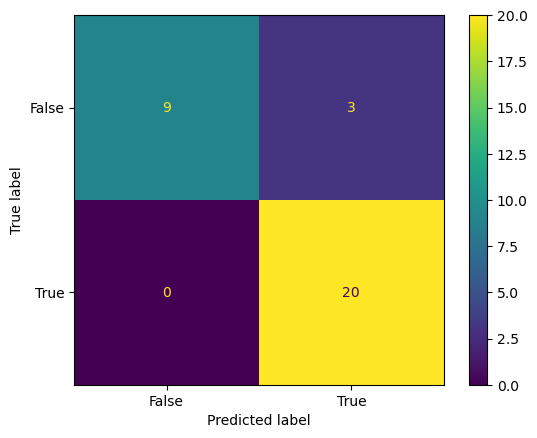

In [454]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
 
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test - 1, rbf_ypred - 1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

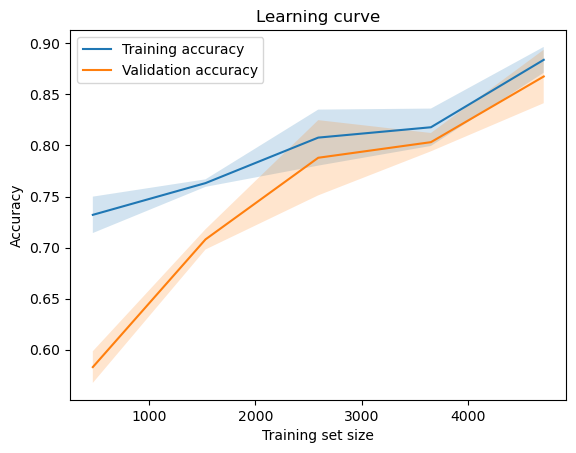

In [455]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


# Create an SVM model
model = SVC(kernel='rbf', C=0.1)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_both, Y_both, cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning curve')
plt.show()


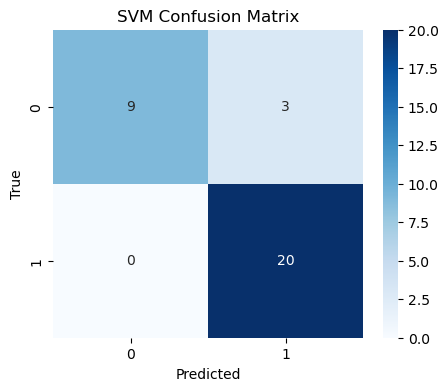

In [456]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test - 1, rbf_ypred - 1)

plt.figure(figsize=(5,4))

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()